<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Exericse_and_Extra-curriculum%20/%F0%9F%9B%A0_08_Introduction_to_NLP_(Natural_Language_Processing)_in_TensorFlow_Exercise_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠 08. Introduction to NLP (Natural Language Processing) in TensorFlow Exercises

1. Rebuild, compile and train `model_1`, `model_2` and `model_5` using the Keras Sequential API instead of the Functional API.
2. Retrain the baseline model with 10% of the training data. How does perform compared to the Universal Sentence Encoder model with 10% of the training data?

3. Try fine-tuning the TF Hub Universal Sentence Encoder model by setting training=True when instantiating it as a Keras layer

```
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True) # turn training on to fine-tune the TensorFlow Hub model

```

4. Retrain the best model you've got so far on the whole training set (no validation split). Then use this trained model to make predictions on the test dataset and format the predictions into the same format as the `sample_submission.csv` file from Kaggle (see the Files tab in Colab for what the `sample_submission.csv` file looks like). Once you've done this, [make a submission to the Kaggle competition](https://www.kaggle.com/c/nlp-getting-started/data), how did your model perform?

5. Combine the ensemble predictions using the majority vote (mode), how does this perform compare to averaging the prediction probabilities of each model?

6. Make a confusion matrix with the best performing model's predictions on the validation set and the validation ground truth labels.

## Getting the data 

In [1]:
# Importing the needed packages 
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# Downloading the helper function file 
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Importing series of function for our use 
from helper_functions import unzip_data, plot_loss_curves, compare_historys

# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")


--2021-07-09 08:21:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-09 08:21:03 (118 MB/s) - ‘helper_functions.py’ saved [10246/10246]

--2021-07-09 08:21:04--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.240, 142.250.65.80, 142.250.188.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [appli

In [3]:
# Loading in the data 
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Shuffling the training dataframe 
train_df_shuffled = train_df.sample(frac =1 , random_state= 42)

# Split our data into training and test sets 
from sklearn.model_selection import  train_test_split
train_sentences , val_sentences , train_labels , val_labels = train_test_split(train_df_shuffled['text'].to_numpy() , 
                                                                               train_df_shuffled['target'].to_numpy(), 
                                                                               test_size = 0.1 , 
                                                                               random_state = 42)

# Checking the shapes 
train_sentences.shape , val_sentences.shape , train_labels.shape , val_labels.shape

((6851,), (762,), (6851,), (762,))

Let's convert our text into numbers by"
- Text Vectorization --> Turns our text into tokens
- Embedding --> Turns out tokens into a vector 

In [4]:
# Setting up text vectorization 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
max_vocab_length = 10000 
max_length = 15 

text_vectorizer = TextVectorization(max_tokens = max_vocab_length , 
                                    output_mode = 'int', 
                                    output_sequence_length = max_length)

# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

# Creating a embedding layer 
from tensorflow.keras import layers 

embedding = layers.Embedding(input_dim= max_vocab_length , 
                             output_dim = 128 , 
                             embeddings_initializer = 'uniform', 
                             input_length = max_vocab_length)


Alright now it's time to jump into exercises! 

### 1. Rebuild, compile and train `model_1`, `model_2` and `model_5` using the Keras Sequential API instead of the Functional API.

**Model_1**

In [5]:
# Building the model 1 (A simple Dense model)
model_1 = tf.keras.Sequential([
    layers.Input(shape = (1, ) , dtype = 'string'), 
    text_vectorizer , 
    embedding , 
    layers.GlobalAveragePooling1D() , 
    layers.Dense(1, activation = 'sigmoid')
    ])
    
# Compiling the model 
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Fitting the model 
model_1_history =  model_1.fit(train_sentences, 
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 6s 14ms/step - loss: 0.6118 - accuracy: 0.6913 - val_loss: 0.5376 - val_accuracy: 0.7546
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4411 - accuracy: 0.8168 - val_loss: 0.4700 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3459 - accuracy: 0.8619 - val_loss: 0.4612 - val_accuracy: 0.7848
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2838 - accuracy: 0.8911 - val_loss: 0.4671 - val_accuracy: 0.7966
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2369 - accuracy: 0.9133 - val_loss: 0.4830 - val_accuracy: 0.7861


**Model_2**

In [6]:
# Building the model 2 (An LSTM model)
model_2 = tf.keras.Sequential([
    layers.Input(shape = (1, ) , dtype = 'string'), 
    text_vectorizer , 
    embedding , 
    layers.LSTM(64), 
    #layers.GlobalAveragePooling1D() , 
    layers.Dense(1, activation = 'sigmoid')
    ])
    
# Compiling the model 
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Fitting the model 
model_2_history =  model_1.fit(train_sentences, 
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2010 - accuracy: 0.9279 - val_loss: 0.4998 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1712 - accuracy: 0.9412 - val_loss: 0.5262 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1487 - accuracy: 0.9485 - val_loss: 0.5534 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1300 - accuracy: 0.9550 - val_loss: 0.5875 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1169 - accuracy: 0.9620 - val_loss: 0.6142 - val_accuracy: 0.7717


**Model_5** 

In [7]:
# Building the model 5 (Conv1D Model)
# Building the model 1 (A simple Dense model)
model_5 = tf.keras.Sequential([
    layers.Input(shape = (1, ) , dtype = 'string'), 
    text_vectorizer , 
    embedding , 
    layers.Conv1D(32 , 5 , activation= 'relu'),
    layers.GlobalMaxPool1D() , 
    layers.Dense(1, activation = 'sigmoid')
    ])
    
# Compiling the model 
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Fitting the model 
model_5_history =  model_1.fit(train_sentences, 
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1047 - accuracy: 0.9651 - val_loss: 0.6478 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0938 - accuracy: 0.9702 - val_loss: 0.6804 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0857 - accuracy: 0.9715 - val_loss: 0.7111 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0803 - accuracy: 0.9721 - val_loss: 0.7382 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0740 - accuracy: 0.9739 - val_loss: 0.7749 - val_accuracy: 0.7677


### 2. Retrain the baseline model with 10% of the training data. How does perform compared to the Universal Sentence Encoder model with 10% of the training data?

In [8]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences)) # Directly taking 10% from our train data
print(train_10_percent_split)

# Splitting our train data with the actual train_data (no double dipping this time)
train_sentences_10_percent = train_sentences[:train_10_percent_split]

# Doing the same but with the train labels 
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_labels_10_percent) , train_labels_10_percent[:5]

685


(685, array([0, 0, 1, 0, 0]))

In [9]:
# Building a base line model 
from sklearn.feature_extraction.text import TfidfVectorizer # (turn text into numbers)
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline 

# Create tokenization and modelling pipeline
baseline_model = Pipeline([
                  ('tfidf' , TfidfVectorizer()) , # Convert words to numbers using tfidf
                  ('clf' , MultinomialNB()), # Model the text 
                ])

# Fit the pipeline to the training data 
baseline_model.fit(train_sentences_10_percent , train_labels_10_percent)

# Evaluating our baseline model 
baseline_score = baseline_model.score(val_sentences , val_labels)
baseline_score

0.7020997375328084

Our **Universal Sentence Encoder** model outperformed our **baseline model** with just 10% of the training data. 

### 3. Try fine-tuning the TF Hub Universal Sentence Encoder model by setting training=True when instantiating it as a Keras layer

In [10]:
# Turn training on to fine-tune the TensorFlow Hub model
import tensorflow_hub as hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True) 

In [11]:
# Create model using the Sequential API
use_model = tf.keras.Sequential([
  sentence_encoder_layer, 
  layers.Dense(1, activation="sigmoid")
])

# Compile model
use_model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Train a classifier on top of pretrained embeddings
use_model_history = use_model.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
22/22 [==============================] - 8s 176ms/step - loss: 0.6119 - accuracy: 0.6964 - val_loss: 0.5622 - val_accuracy: 0.7664
Epoch 2/5
22/22 [==============================] - 3s 159ms/step - loss: 0.4606 - accuracy: 0.8219 - val_loss: 0.5086 - val_accuracy: 0.7717
Epoch 3/5
22/22 [==============================] - 3s 158ms/step - loss: 0.3159 - accuracy: 0.8993 - val_loss: 0.4748 - val_accuracy: 0.7835
Epoch 4/5
22/22 [==============================] - 3s 158ms/step - loss: 0.1861 - accuracy: 0.9664 - val_loss: 0.4892 - val_accuracy: 0.7743
Epoch 5/5
22/22 [==============================] - 3s 157ms/step - loss: 0.1064 - accuracy: 0.9883 - val_loss: 0.5173 - val_accuracy: 0.7703


### 4. Retrain the best model you've got so far on the whole training set (no validation split). 

Then use this trained model to make predictions on the test dataset and format the predictions into the same format as the sample_submission.csv file from Kaggle (see the Files tab in Colab for what the sample_submission.csv file looks like). Once you've done this, make a submission to the Kaggle competition, how did your model perform?

In [12]:
whole_train_sentences = train_df_shuffled['text'].to_numpy()
whole_train_labels =  train_df_shuffled['target'].to_numpy() 

len(whole_train_sentences) , len(whole_train_labels)

(7613, 7613)

In [13]:
# Create model using the Sequential API
model = tf.keras.Sequential([
  sentence_encoder_layer, 
  layers.Dense(64 , activation ='relu'),
  layers.Dense(1, activation="sigmoid")
])

# Compile model
model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Train a classifier on top of pretrained embeddings
model_history =model.fit(whole_train_sentences,
                              whole_train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
238/238 [==============================] - 39s 151ms/step - loss: 0.4131 - accuracy: 0.8235 - val_loss: 0.2599 - val_accuracy: 0.9186
Epoch 2/5
238/238 [==============================] - 35s 149ms/step - loss: 0.1989 - accuracy: 0.9245 - val_loss: 0.0777 - val_accuracy: 0.9764
Epoch 3/5
238/238 [==============================] - 35s 149ms/step - loss: 0.0656 - accuracy: 0.9771 - val_loss: 0.0381 - val_accuracy: 0.9856
Epoch 4/5
238/238 [==============================] - 35s 149ms/step - loss: 0.0387 - accuracy: 0.9852 - val_loss: 0.0482 - val_accuracy: 0.9803
Epoch 5/5
238/238 [==============================] - 35s 149ms/step - loss: 0.0260 - accuracy: 0.9899 - val_loss: 0.0177 - val_accuracy: 0.9934


In [14]:
# Make predictions with the model
pred_probs = model.predict(test_df['text'].to_numpy())

# Convert prediction probs to labels
preds = tf.squeeze(tf.round(pred_probs))
preds = tf.cast(preds , dtype = tf.int32)

In [16]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [17]:
submission = pd.DataFrame({'id': test_df['id'].values , 
                           'target': (preds.numpy())})
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [18]:
preds[:20]

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int32)>

In [19]:
submission.to_csv('submission.csv' , index = False)

Alright we have made a submission! 

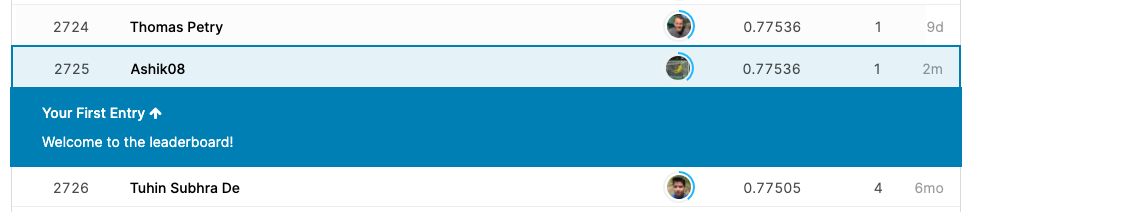

### 5. Combine the ensemble predictions using the majority vote (mode), how does this perform compare to averaging the prediction probabilities of each model?